<a href="https://colab.research.google.com/github/VietHuongUIT/Business_Analyst/blob/main/DA_report_LinearDiscriminantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

In [2]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 24.0 MB/s 


# 1. Import library

In [3]:
# Import library: 

import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 2. CODE IMPLEMENTATION: STOCK MARKET SENTIMENT ANALYSIS

## 2.1 Understand the Dataset

In [4]:
# Load the data 1:
df1=pd.read_csv('Combined_News_DJIA.csv')
df1.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
# get subjectivity:

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# get polarity:

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [6]:
# create function to get the sentiment score:

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [7]:
def Cal_oneTop1(df):
  df1=df
  #Combine the top news headline:
  headline= []
  for row  in range (0, len(df1.index)):
      headline.append(" ".join(str(x) for x in df1.iloc[row, 2:3]))
  # clean the data:
  clean_headline = []

  for i in range (0, len(headline)):
      clean_headline.append(re.sub("b[(')]", '', headline[i])) # remove b'
      clean_headline[i] = re.sub('b[(")]', '', clean_headline[i]) # remove b"
      clean_headline[i] = re.sub("\'", '', clean_headline[i]) # remove \'
  df1['Subjectivity'] = df1['Top1'].apply(get_subjectivity)
  df1['Polarity'] = df1['Top1'].apply(get_polarity)
    # get Sentiment score for each day:
  compound=[]
  neg=[]
  pos=[]
  neu=[]
  SIA=0
  for i in range (0, len(df1['Top1'])):
      SIA= getSIA(df1['Top1'][i])
      compound.append(SIA['compound'])
      neg.append(SIA['neg'])
      pos.append(SIA['pos'])
      neu.append(SIA['neu'])
  df1['compound']= compound
  df1['neg']= neg
  df1['pos']=pos
  df1['neu']=neu
  df2= df1[['Subjectivity','Polarity','compound','neg','pos','neu']]
  return df2 

In [8]:
df=Cal_oneTop1(df1)
df

,Subjectivity,Polarity,compound,neg,pos,neu
0,0.000000,0.000000,-0.5994,0.262,0.000,0.738
1,0.000000,0.000000,0.5426,0.090,0.230,0.680
2,1.000000,0.000000,0.0258,0.169,0.175,0.656
3,0.000000,0.000000,-0.7184,0.462,0.000,0.538
4,0.000000,0.000000,0.2023,0.000,0.167,0.833
...,...,...,...,...,...,...
1984,0.500000,0.500000,-0.2263,0.203,0.144,0.654
1985,0.500000,0.525000,0.8316,0.147,0.456,0.397
1986,0.000000,0.000000,0.0000,0.000,0.000,1.000
1987,0.100000,0.000000,0.0000,0.000,0.000,1.000


In [9]:
def Cal_oneTop(df, n):
  df1=df
  #Combine the top news headline:
  headline= []
  for row  in range (0, len(df1.index)):
      headline.append(" ".join(str(x) for x in df1.iloc[row, (n-1):(n)]))
  # clean the data:
  clean_headline = []

  for i in range (0, len(headline)):
      clean_headline.append(re.sub("b[(')]", '', headline[i])) # remove b'
      clean_headline[i] = re.sub('b[(")]', '', clean_headline[i]) # remove b"
      clean_headline[i] = re.sub("\'", '', clean_headline[i]) # remove \'
  df1['Subjectivity'] = df1['Top1'].apply(get_subjectivity)
  df1['Polarity'] = df1['Top1'].apply(get_polarity)
    # get Sentiment score for each day:
  compound=[]
  neg=[]
  pos=[]
  neu=[]
  SIA=0
  for i in range (0, len(df1['Top1'])):
      SIA= getSIA(df1['Top1'][i])
      compound.append(SIA['compound'])
      neg.append(SIA['neg'])
      pos.append(SIA['pos'])
      neu.append(SIA['neu'])
  df1['compound']= compound
  df1['neg']= neg
  df1['pos']=pos
  df1['neu']=neu
  df2= df1[['Subjectivity','Polarity','compound','neg','pos','neu']]
  return df2    

In [10]:
df_temp=Cal_oneTop(df1, 3)
df_temp

,Subjectivity,Polarity,compound,neg,pos,neu
0,0.000000,0.000000,-0.5994,0.262,0.000,0.738
1,0.000000,0.000000,0.5426,0.090,0.230,0.680
2,1.000000,0.000000,0.0258,0.169,0.175,0.656
3,0.000000,0.000000,-0.7184,0.462,0.000,0.538
4,0.000000,0.000000,0.2023,0.000,0.167,0.833
...,...,...,...,...,...,...
1984,0.500000,0.500000,-0.2263,0.203,0.144,0.654
1985,0.500000,0.525000,0.8316,0.147,0.456,0.397
1986,0.000000,0.000000,0.0000,0.000,0.000,1.000
1987,0.100000,0.000000,0.0000,0.000,0.000,1.000


In [11]:
def Cal_all_Top(df):
  dem=0
  sum_dataframe=Cal_oneTop(df, 3)
  for i in range (4,28):
    dem=dem+1
    temp_Top=Cal_oneTop(df, i)
    sum_dataframe=sum_dataframe+temp_Top
    print(sum_dataframe)
  result=sum_dataframe/dem
  return result


In [12]:
df_temp123 =  Cal_all_Top(df1)
df_temp123

      Subjectivity  Polarity  compound    neg    pos    neu
0         0.000000  0.000000   -1.1988  0.524  0.000  1.476
1         0.000000  0.000000    1.0852  0.180  0.460  1.360
2         2.000000  0.000000    0.0516  0.338  0.350  1.312
3         0.000000  0.000000   -1.4368  0.924  0.000  1.076
4         0.000000  0.000000    0.4046  0.000  0.334  1.666
...            ...       ...       ...    ...    ...    ...
1984      1.000000  1.000000   -0.4526  0.406  0.288  1.308
1985      1.000000  1.050000    1.6632  0.294  0.912  0.794
1986      0.000000  0.000000    0.0000  0.000  0.000  2.000
1987      0.200000  0.000000    0.0000  0.000  0.000  2.000
1988      0.733333 -0.133333   -1.1148  0.208  0.000  1.792

[1989 rows x 6 columns]
      Subjectivity  Polarity  compound    neg    pos    neu
0              0.0     0.000   -1.7982  0.786  0.000  2.214
1              0.0     0.000    1.6278  0.270  0.690  2.040
2              3.0     0.000    0.0774  0.507  0.525  1.968
3              

,Subjectivity,Polarity,compound,neg,pos,neu
0,0.000000,0.000000,-0.624375,0.272917,0.000000,0.768750
1,0.000000,0.000000,0.565208,0.093750,0.239583,0.708333
2,1.041667,0.000000,0.026875,0.176042,0.182292,0.683333
3,0.000000,0.000000,-0.748333,0.481250,0.000000,0.560417
4,0.000000,0.000000,0.210729,0.000000,0.173958,0.867708
...,...,...,...,...,...,...
1984,0.520833,0.520833,-0.235729,0.211458,0.150000,0.681250
1985,0.520833,0.546875,0.866250,0.153125,0.475000,0.413542
1986,0.000000,0.000000,0.000000,0.000000,0.000000,1.041667
1987,0.104167,0.000000,0.000000,0.000000,0.000000,1.041667


In [13]:
df1['id'] = range(1, len(df) + 1)
df_temp123['id'] = range(1, len(df) + 1)

In [14]:
df1

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Subjectivity,Polarity,compound,neg,pos,neu,id
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",0.000000,0.000000,-0.5994,0.262,0.000,0.738,1
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",0.000000,0.000000,0.5426,0.090,0.230,0.680,2
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",1.000000,0.000000,0.0258,0.169,0.175,0.656,3
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,0.000000,0.000000,-0.7184,0.462,0.000,0.538,4
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,0.000000,0.000000,0.2023,0.000,0.167,0.833,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,"Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,0.500000,0.500000,-0.2263,0.203,0.144,0.654,1985
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cut

In [15]:
df1_merge=df1.merge(df_temp123, how = 'inner', on = 'id')
df1_merge

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,neg_x,pos_x,neu_x,id,Subjectivity_y,Polarity_y,compound_y,neg_y,pos_y,neu_y
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.262,0.000,0.738,1,0.000000,0.000000,-0.624375,0.272917,0.000000,0.768750
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.090,0.230,0.680,2,0.000000,0.000000,0.565208,0.093750,0.239583,0.708333
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.169,0.175,0.656,3,1.041667,0.000000,0.026875,0.176042,0.182292,0.683333
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.462,0.000,0.538,4,0.000000,0.000000,-0.748333,0.481250,0.000000,0.560417
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,0.000,0.167,0.833,5,0.000000,0.000000,0.210729,0.000000,0.173958,0.867708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,0.203,0.144,0.654,1985,0.520833,0.520833,-0.235729,0.211458,0.150000,0.681250
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,0.147,0.456,0.397,1986,0.520833,0.546875,0.866250,0.153125,0.475000,0.413542
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexu

# Merge two Pandas DataFrames based on closest DateTime

In [16]:
#load the data2:
df2= pd.read_csv('upload_DJIA_table.csv')
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [17]:
df1_merge.shape, df2.shape

((1989, 40), (1989, 7))

In [18]:
# Merge the data st on the date field:

merge= df1_merge.merge(df2, how='inner', on='Date')
merge

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,compound_y,neg_y,pos_y,neu_y,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,-0.624375,0.272917,0.000000,0.768750,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.565208,0.093750,0.239583,0.708333,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.026875,0.176042,0.182292,0.683333,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,-0.748333,0.481250,0.000000,0.560417,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,0.210729,0.000000,0.173958,0.867708,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,-0.235729,0.211458,0.150000,0.681250,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,0.866250,0.153125,0.475000,0.413542,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terror

In [19]:
#Create new dataframe contain relevants features:

df= merge[['Label','Open', 'High', 'Low','Volume','Subjectivity_y','Polarity_y','compound_y','neg_y','pos_y','neu_y']]
df

,Label,Open,High,Low,Volume,Subjectivity_y,Polarity_y,compound_y,neg_y,pos_y,neu_y
0,0,11432.089844,11759.959961,11388.040039,212830000,0.000000,0.000000,-0.624375,0.272917,0.000000,0.768750
1,1,11729.669922,11867.110352,11675.530273,183190000,0.000000,0.000000,0.565208,0.093750,0.239583,0.708333
2,0,11781.700195,11782.349609,11601.519531,173590000,1.041667,0.000000,0.026875,0.176042,0.182292,0.683333
3,0,11632.809570,11633.780273,11453.339844,182550000,0.000000,0.000000,-0.748333,0.481250,0.000000,0.560417
4,1,11532.070312,11718.280273,11450.889648,159790000,0.000000,0.000000,0.210729,0.000000,0.173958,0.867708
...,...,...,...,...,...,...,...,...,...,...,...
1984,0,17355.210938,17355.210938,17063.080078,138740000,0.520833,0.520833,-0.235729,0.211458,0.150000,0.681250
1985,1,17190.509766,17409.720703,17190.509766,112190000,0.520833,0.546875,0.866250,0.153125,0.475000,0.413542
1986,1,17456.019531,17704.509766,17456.019531,106380000,0.000000,0.000000,0.000000,0.000000,0.000000,1.041667
1987,1,17712.759766,17930.609375,17711.800781,133030000,0.104167,0.000000,0.000000,0.000000,0.000000,1.041667


In [20]:
#create the feature data set:
X=df

X=np.array(X.drop(['Label'],1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [21]:
#create the target data set:

y= np.array(df['Label'])

In [22]:
# Split the data:

x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0)

In [23]:
#create and train the model:

model= LinearDiscriminantAnalysis().fit(x_train, y_train)

# Model predicton:

predict= model.predict(x_test)

predict

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

# Classification Report

In [24]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       193
           1       0.80      0.86      0.83       205

    accuracy                           0.81       398
   macro avg       0.82      0.81      0.81       398
weighted avg       0.82      0.81      0.81       398



# Confusion Matrix

In [25]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


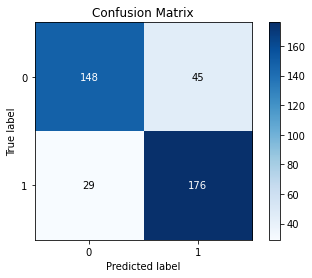

In [26]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,predict)